In [ ]:
'''
파일 입출력
- 저장 장치에 저장된 파일을 읽어오거나 저장하는 작업
'''

In [ ]:
# 파일 열기와 닫기
# 파일 열기: open()
# open("파일 경로", mode = "r", encoding = "원하는 인코딩 - utf8")
# open으로 파일을 읽으면 `파일 객체` 변환
f = open("example.txt", "w", encoding = "utf-8")
f.write("파이썬 파일 입출력 예제\n")
f.write("파이썬 공부!")

# 파일 닫기: close()
# 열린 파일을 닫아 시스템 자원을 해제함
f.close()

In [3]:
# 파일 읽기
# read(): 전체 내용을 한번에 읽기
f = open("example.txt", "r", encoding = "utf-8")
content = f.read()
print(content)
f.close()

파이썬 파일 입출력 예제
파이썬 공부!


In [5]:
# readilne(): 한 줄씩 순차적으로 읽기
f = open("example.txt", "r", encoding = "utf-8")
line1 = f.readline()
line2 = f.readline()

print("첫 번째 줄:", line1.strip())
print("두 번째 줄:", line2)
f.close()

첫 번째 줄: 파이썬 파일 입출력 예제
두 번째 줄: 파이썬 공부!


In [6]:
# for문으로 읽기
f = open("example.txt", "r", encoding = "utf-8")
for line in f:
    print(line.strip())
f.close()

파이썬 파일 입출력 예제
파이썬 공부!


In [8]:
# readlines(): 모든 줄을 한번에 리스트로 읽기
f = open("example.txt", "r", encoding = "utf-8")
contents = f.readlines()
print(contents[1])
f.close()

파이썬 공부!


In [9]:
# tell(): 현재 읽고 있는 위치(바이트)를 반환
f = open("example.txt", "r", encoding = "utf-8")
print("처음 위치:", f.tell())
f.read(5)
print("5바이트 읽은 후 위치:", f.tell())
f.close()

처음 위치: 0
5바이트 읽은 후 위치: 13


In [ ]:
# seek(): 파일 포인터 위치를 이동
f = open("example.txt", "r", encoding = "utf-8")
print(f.read(10)) # 10 바이트를 읽기
f.seek(0) # 파일의 맨 처음으로 이동
print(f.read())
f.close()

파이썬 파일 입출력
파이썬 파일 입출력 예제
파이썬 공부!


In [14]:
# a 모드: 추가 쓰기
f = open("example.txt", "a", encoding = "utf-8")
f.write("\n추가한 내용입니다.^^")
f.close()

In [15]:
# with 문
# 파일 입출력시에 자동으로 close()를 호출해주는 구문
# 파일 쓰기
with open("with_example.txt", "w", encoding = "utf-8") as f1:
    f1.write("with문으로 작성한 파일이에용\n")
    f1.write("파일 입출력 완료")

In [ ]:
# 예제1. 파일에서 랜덤 추출
import random
with open("words.txt", "w", encoding = "utf-8") as f1:
    words = [
      "apple", "banana", "orange", "grape", "lemon",
      "peach", "melon", "cherry", "plum", "pear",
      "school", "friend", "family", "flower", "garden",
      "window", "bottle", "pencil", "summer", "winter",
      "happy", "future", "travel", "animal", "market",
      "doctor", "planet", "energy", "nature", "memory"
  ]
    for i in words:
        f1.write(i + "\n")

with open("words.txt", "r", encoding = "utf-8") as f1:
    data = f1.readlines()
    for i in range(5):
        word = random.choice(data).strip()
        print(word)

apple
melon
friend
apple
winter


In [17]:
# 예제2
with open("with_example.txt", "a", encoding = "utf-8") as f1:
    while True:
        text = input("저장할 내용을 입력해주세요. (종료: z)")
        if text == "Z" or text == "z":
            break
        f1.write(text + "\n")


In [7]:
# 실습1. 회원 명부 작성하기
# 1. 사용자에게 3명의 회원에 대한 이름 비밀번호 입력받기
# 2. 사용자로부터 입력된 정보를 member.txt에 기록(파일 쓰기 모드)

with open("member.txt", "w", encoding = "utf-8") as f:
    for i in range(3):
        print(f"{i + 1}번째 회원 정보 입력")
        name = input("이름을 입력해주세요.")
        pw = input("비밀번호를 입력해주세요.")
        f.write(f"{name}: {pw}\n")

print("회원정보가 입력되었습니다.")


1번째 회원 정보 입력
2번째 회원 정보 입력
3번째 회원 정보 입력
회원정보가 입력되었습니다.


In [8]:
# 3. member.txt에 저장된 회원명부 출력(파일 읽기 모드)
with open("member.txt", "r", encoding = "utf-8") as f:
    print("=======회원 명부=======")
    for line in f:
        line = line.strip()
        name, pw = line.split(": ")
        print(f"이름: {name}, 비밀번호: {pw}")

=======회원 명부=======
이름: 장원영, 비밀번호: jwy1234
이름: 유재석, 비밀번호: yjs1234
이름: 원두희, 비밀번호: wdh1234


In [17]:
# 실습2. 회원 명부를 이용한 로그인 기능

user_name = input("이름을 입력해주세요.")
user_pw = input("비밀번호를 입력해주세요.")
flag = False

with open("member.txt", "r", encoding = "utf-8") as f:
    for line in f:
        line = line.strip()
        name, pw = line.split(":")
        name = name.strip()
        pw = pw.strip()
        
        if user_name == name and user_pw == pw:
            flag = True
            break
   
    if flag == True:
        print("로그인이 성공하였습니다.")
    
    else:
        print("로그인이 실패하였습니다.")

로그인이 성공하였습니다.


In [ ]:
# 실습3. 로그인 성공 시 전화번호 저장 하기

if flag:
    print("로그인이 성공하였습니다.")
    
    tel = input("전화번호를 입력해주세요.").strip()

    with open("member_tel.txt", "a", encoding = "utf-8") as f_tel:
        f_tel.write(f"{user_name}:{tel}\n")

else:
    print("로그인 실패하였습니다.")



로그인이 성공하였습니다.


In [23]:
records = []
with open("member_tel.txt", "r", encoding = "utf-8") as f_tel:
    for line in f_tel:
        line = line.strip()
        name, tel = line.split(":")
        records.append([name, tel])

found = False

for item in records:
    if item[0] == user_name:
        new_tel = input("전화번호를 입력해주세요(XXX-XXXX-XXXX).")
        item[1] = new_tel
        found = True
        break

if found == False:
    new_tel = input("전화번호를 입력해주세요(XXX-XXXX-XXXX).")
    records.append([user_name, new_tel])

with open("member_tel.txt", "w", encoding = "utf-8") as f_tel:
    for name, tel in records:
        f_tel.write(f"{name}:{tel}\n")
        print(f"이름: {name}, 전화번호: {tel}")

이름: 장원영, 전화번호: 010-1111-2222
이름: 유재석, 전화번호: 010-1234-5678
이름: 원두희, 전화번호: 010-1234-7890


In [24]:
import os

if os.path.exists("member1.txt"):
    print("member1.txt가 이미 존재합니다. 회원등록을 건너뜁니다.\n")
else:
    with open("mamber1.txt", "w", encoding = "utf-8") as f:
        for i in range(3):
            name = input(f"{i + 1}번째 회원의 이름:")
            password = input(f"{i + 1}번째 회원의 비밀번호:")
            f.write(f"{name}:{password}\n")

print("\n[회원 명부 저장 완료]\n")


[회원 명부 저장 완료]



In [30]:
input_name = input("로그인 - 이름을 입력해주세요.")
input_password = input("로그인 - 비밀번호를 입력해주세요.")

login = False
with open("mamber1.txt", "r", encoding = "utf-8") as f:
    for line in f:
        name, password = line.strip().split(":")
        if input_name == name and input_password == password:
            login = True
            break

In [31]:
if login:
    print("\n로그인 성공!")

    # 기존 전화번호 데이터 로드
    phone_data = {}

    if os.path.exists("member_tel1.txt"):
        with open("member_tel1.txt", "r", encoding = "utf-8") as f:
            for line in f:
                name, phone = line.strip().split(",")
                phone_data[name] = phone

    # 전화번호 입력
    new_phone = input(f"{input_name}님의 전화번호를 입력해주세요.")

    # 추가 또는 수정
    if input_name in phone_data:
        print("기존 전화번호 수정")
    
    else:
        print("전화번호 새로 추가")

    phone_data[input_name] = new_phone

    # 전화번호 파일 갱신
    with open("mamber_tel1.txt", "w", encoding = "utf-8") as f:
        for name, phone in phone_data.items():
            f.write(f"{name}:{phone}\n")
            print("전화번호 저장완료!")

else:
    print("\n로그인 실패!")



로그인 성공!
전화번호 새로 추가
전화번호 저장완료!


c:\Users\user\Desktop\wdh\2_python
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x16\x16\x15\x16\x18\x1e\x1b\x17\x18\x18\x19\x18\x1a \x1b\x1b\x18\x1d\x1b \x1b \x1a\x1a\x1e ( \x1d\x1d%\x1b\x1e\x1a"1!%)+...\x1d\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-# &/-2-----/--/-.-/------/-/-/------/-------/--------\xff\xc0\x00\x11\x08\x00\xa8\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x03\x06\x00\x02\x07\x01\x08\xff\xc4\x00@\x10\x00\x02\x01\x02\x04\x04\x03\x06\x04\x05\x03\x03\x03\x05\x00\x00\x01\x02\x11\x03!\x00\x04\x121\x05AQa"q\x81\x06\x132\x91\xa1\xb1B\xc1\xd1\xf0#Rb\xe1\xf1\x07\x14r3\x82\xb2\x15\x16\x92CSc\xa2\xc2\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x00\x05\xff\xc4\x00.\x11\x00\x02\x02\x02\x02\x01\x03\x02\x05\x04\x03\x01\x00\x00\x00\x00\x00\x01\x02\x11\

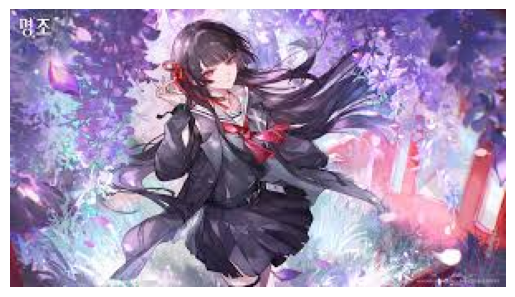

In [19]:
# 바이너리 파일 읽기
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("images/images.jpg")
plt.imshow(img)
plt.axis('off')

import os

print(os.getcwd())

with open("images/images.jpg", "rb") as f:
    img = f.read()
    print(img)

with open("images/images_copy.jpg", "wb") as f:
    f.write(img)


In [15]:
# pickle 모듈
# - 객체의 형태를 유지하면서 파일에 저장하고 불러올 수 있음
import pickle

# 리스트, 딕셔너리 파일 저장
with open("pickle.txt", "wb") as f:
    li = ["dog", "cat"]
    dic = {1: "dog", 2: "cat"}

    pickle.dump(li, f)
    pickle.dump(dic, f)

 # 읽기
with open("pickle.txt", "rb") as f:
    li = pickle.load(f)
    dic = pickle.load(f)

    print(li, dic)

['dog', 'cat'] {1: 'dog', 2: 'cat'}
